### WELCOME TO APIS

![legtsgo](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExNTRrMHAwMDlvajYzcW91NHVhMGRteTNiY3I4ZGp0enQ1a3l0YTFxdiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3oKIPa2TdahY8LAAxy/giphy.gif)

### Lo primero que hacemos es llamar a la api con el codigo que nos da en Rapi API

import requests

url = "https://ryanair2.p.rapidapi.com/api/v1/getActiveAirports"

headers = {
	"x-rapidapi-key": "xxxxxxxxxxxxxxx",
	"x-rapidapi-host": "ryanair2.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json())

In [ ]:
airports = response.json()

### Vemos que keys nos interesa y nos quedamos con la que queramos

In [ ]:
airports.keys()

In [ ]:
airports= airports['data']

In [ ]:
airports

### Vemos la longitud de airports

In [ ]:
len(airports)

### Cogemos una muestra de airports para ver que contiene cada diccionario

In [ ]:
airports[0]

### Escogemos lo que mas nos interese de el diccionario

In [ ]:
code, name, city, country, timeZone, coordinates

### Hacemos listas vacias para lo que nos interesa y le metemos los valores correspondientes

In [ ]:
nombres =[]
codigos=[]
paises=[]
ciudades=[]
zona_horaria=[]
coordenadas=[]

for airport in airports:
    codigos.append(airport["code"])
    nombres.append(airport["name"])
    if "country" in airport:
        paises.append(airport["country"]["name"])
    else: paises.append("NA")
    if "city" in airport:
        ciudades.append(airport["city"]["name"])
    else: ciudades.append("NA")
    if  "timeZone" in airport:
        zona_horaria.append(airport["timeZone"])
    else: zona_horaria.append("NA")
    if "coordinates" in airport:
        coordenadas.append(airport["coordinates"])
    else: coordenadas.append("NA")
    
        

### Creamos el df

In [ ]:
import pandas as pd

In [ ]:
airports_df = pd.DataFrame({"paises":paises, "ciudades":ciudades, "nombre de aeropuertos":nombres, "codigos de aeropuertos":codigos, "zona horaria":zona_horaria, "coordenadas":coordenadas})
airports_df

### Lo convertimos en cdv

In [ ]:
airports_df.to_csv("first_project_airports.csv", header=True, index=False)

# Desde aqui conmenzamos a trabajar con el csv para no gastar llamdas inecesarias y poder toquetar con tranquilidad

![legtsgo](https://i.gifer.com/1FA.gif)

### Importamos el pd y llamamos al csv

In [2]:
import pandas as pd

In [3]:
airports_df = pd.read_csv("first_project_airports.csv")

### Le cambiamos los espacios por barras bajas 

In [5]:
airports_df.columns = [columns.lower().replace(" ", "_") for columns in airports_df.columns]

### Creamos columnas sobre codigos que empiezan por A y otra de continentes

In [7]:
airports_df["codigo_empieza_por_A"] = airports_df["codigos_de_aeropuertos"].apply(lambda codigo: codigo.startswith("A"))

In [8]:
airports_df["continentes"] = airports_df["zona_horaria"].apply(lambda continente: continente.split("/")[0])

In [9]:
airports_df

,paises,ciudades,nombre_de_aeropuertos,codigos_de_aeropuertos,zona_horaria,coordenadas,codigo_empieza_por_A,continentes
0,Denmark,Aalborg,Aalborg,AAL,Europe/Copenhagen,"{'latitude': 57.0534, 'longitude': 9.5057}",True,Europe
1,Denmark,Aarhus,Aarhus,AAR,Europe/Copenhagen,"{'latitude': 56.3, 'longitude': 10.619}",True,Europe
2,United Kingdom,Aberdeen,Aberdeen,ABZ,Europe/London,"{'latitude': 57.2019, 'longitude': -2.19778}",True,Europe
3,Spain,Lanzarote,Lanzarote,ACE,Atlantic/Canary,"{'latitude': 28.9455, 'longitude': -13.6052}",True,Atlantic
4,Morocco,Agadir,Agadir,AGA,Africa/Casablanca,"{'latitude': 30.325, 'longitude': -9.41307}",True,Africa
...,...,...,...,...,...,...,...,...
232,Spain,Jerez,Jerez,XRY,Europe/Madrid,"{'latitude': 36.7446, 'longitude': -6.06011}",False,Europe
233,Croatia,Zadar,Zadar,ZAD,Europe/Zagreb,"{'latitude': 44.1083, 'longitude': 15.3467}",False,Europe
234,Croatia,Zagreb,Zagreb,ZAG,Europe/Zagreb,"{'latitude': 45.7431, 'longitude': 16.0689}",False,Europe
235,Spain,Zaragoza,Zaragoza,ZAZ,Europe/Madrid,"{'latitude': 41.6662, 'longitude': -1.04155}",False,Europe


### Hazemos un nunique para asegurarnos que esta todo bien

In [11]:
airports_df.nunique()

paises                     37
ciudades                  226
nombre_de_aeropuertos     237
codigos_de_aeropuertos    237
zona_horaria               40
coordenadas               237
codigo_empieza_por_A        2
continentes                 4
dtype: int64

### Hacemos una tabla en la que junte los nombres de aeropuertos y los codigos

In [13]:
aeropuertos_codigos_df = airports_df[["nombre_de_aeropuertos","codigos_de_aeropuertos"]]
aeropuertos_codigos_df

,nombre_de_aeropuertos,codigos_de_aeropuertos
0,Aalborg,AAL
1,Aarhus,AAR
2,Aberdeen,ABZ
3,Lanzarote,ACE
4,Agadir,AGA
...,...,...
232,Jerez,XRY
233,Zadar,ZAD
234,Zagreb,ZAG
235,Zaragoza,ZAZ


### Hacemos una tabla que contenga los continentes y el numero de aeropuertos que tenga

In [15]:
aeropuertos_continente_df = airports_df.groupby("continentes")["nombre_de_aeropuertos"].count().reset_index()
aeropuertos_continente_df.sort_values(by = "nombre_de_aeropuertos",ascending=False)

,continentes,nombre_de_aeropuertos
3,Europe,213
0,Africa,12
2,Atlantic,8
1,Asia,4


### Otra lista con la zona horaria y el numero de aropuertos de cada una y u  ranquing de las 5 primeras

In [17]:
aeropuertos_zona_h_df = airports_df.groupby("zona_horaria")["nombre_de_aeropuertos"].count().reset_index()
top_5_zonas_horarias = aeropuertos_zona_h_df.sort_values(by="nombre_de_aeropuertos", ascending=False).head(5).reset_index()
top_5_zonas_horarias

,index,zona_horaria,nombre_de_aeropuertos
0,30,Europe/Rome,32
1,26,Europe/Paris,27
2,21,Europe/London,22
3,23,Europe/Madrid,22
4,9,Europe/Athens,14


### Una tabla con paises, ciudades y nombres de aeropuertos

In [19]:
aeropuertos_zona_h_df = airports_df[["paises","ciudades","nombre_de_aeropuertos"]]
aeropuertos_zona_h_df

,paises,ciudades,nombre_de_aeropuertos
0,Denmark,Aalborg,Aalborg
1,Denmark,Aarhus,Aarhus
2,United Kingdom,Aberdeen,Aberdeen
3,Spain,Lanzarote,Lanzarote
4,Morocco,Agadir,Agadir
...,...,...,...
232,Spain,Jerez,Jerez
233,Croatia,Zadar,Zadar
234,Croatia,Zagreb,Zagreb
235,Spain,Zaragoza,Zaragoza


### Hacemos un grafico con los paises y el numero de aeropuertos y otro de continentes y el numero de aeropuertos de cada uno

In [21]:
import matplotlib.pyplot as plt

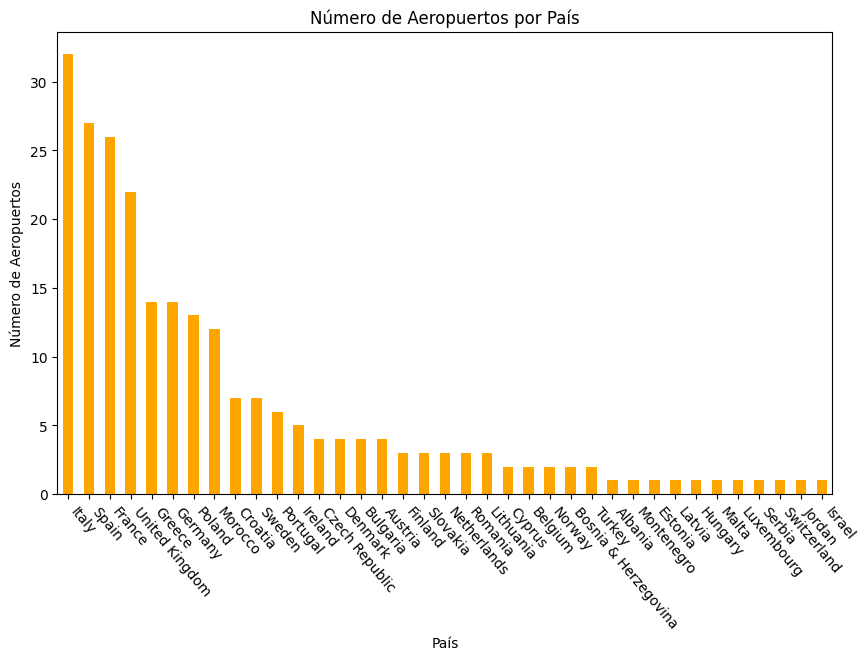

In [22]:
aeropuertos_por_pais = airports_df["paises"].value_counts()

plt.figure(figsize=(10, 6))
aeropuertos_por_pais.plot(kind="bar", color="orange")
plt.title("Número de Aeropuertos por País")
plt.xlabel("País")
plt.ylabel("Número de Aeropuertos")
plt.xticks(rotation= -50, ha="left")
plt.show()

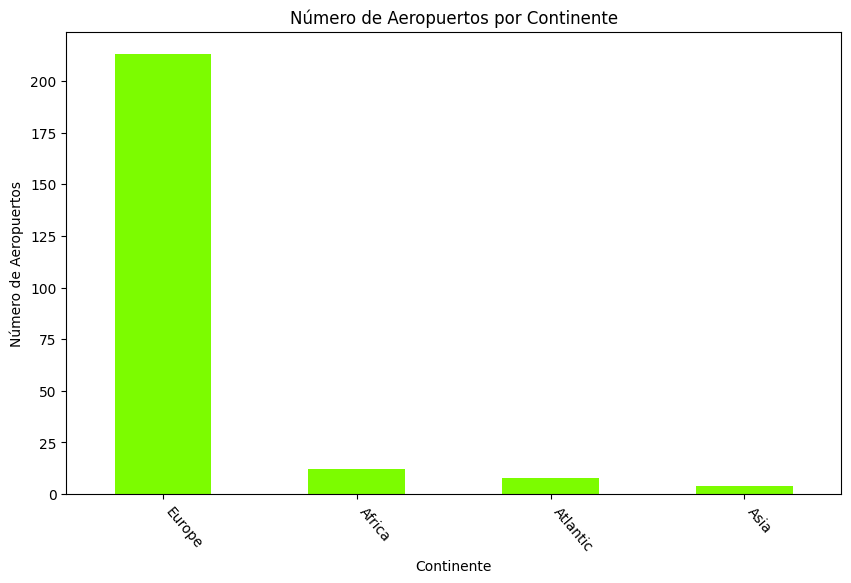

In [23]:
aeropuertos_por_continente = airports_df["continentes"].value_counts()

plt.figure(figsize=(10, 6))
aeropuertos_por_continente.plot(kind="bar", color="lawngreen")
plt.title("Número de Aeropuertos por Continente")
plt.xlabel("Continente")
plt.ylabel("Número de Aeropuertos")
plt.xticks(rotation= -50, ha="left")
plt.show()